# Import Libraries

For tasks including data processing, visualization, and machine learning, this code imports a number of libraries and modules. It imports seaborn including matplotlib.pyplot for data visualization, numpy (renamed as nym) for numerical calculations, and pandas (renamed as ppd) for managing data structures. While train_test_split as well as GridSearchCV from sklearn.model_selection assist in splitting the dataset and carrying out hyperparameter tuning, the data is scaled using the MinMaxScaler from sklearn.preprocessing. For the purpose of evaluating the performance of the model, it also imports a number of evaluation measures from sklearn.metrics, including and more. Lastly, it uses warnings to suppress warnings.filter alerts.

In [ ]:
#using the library to alter the data-set.
import pandas as ppd
#bringing in the infor-mation calculation methods
import numpy as nym
#Here, the libraries serve to draw the graph.
import seaborn as sns
#used this visualization library to create visual representations
import matplotlib.pyplot as mpl
# for scalling information-set we use the library
from sklearn.preprocessing import MinMaxScaler
# here we using the splitting module for dividing information
from sklearn.model_selection import train_test_split
# Importing variousn from the  module
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
# Suppress all caustions
import warnings
warnings.filterwarnings("ignore")

# Reading Test Dataset

In [ ]:
# executing the information of examined data
test_data =ppd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


# Read Train Dataset

In [ ]:
train_data =ppd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# Dataset Information

In [ ]:
test_data.shape

(175341, 45)

In [ ]:
train_data.shape

(82332, 45)

In [ ]:
combined_df = ppd.concat([train_data,test_data],axis=0,ignore_index=True)

In [ ]:
combined_df.shape

(257673, 45)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
combined_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
combined_df.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
combined_df.duplicated().sum()

0

In [ ]:
combined_df['attack_cat'].value_counts()

,count
attack_cat,
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511


# Mapping

In [ ]:
# First, create a mapping from categories to values 0 to 9
category_mapping = {category: idx for idx, category in enumerate(combined_df['attack_cat'].unique())}

# Applying the mapping to the target column
combined_df['attack_cat'] = combined_df['attack_cat'].map(category_mapping)

In [ ]:
category_mapping

{'Normal': 0,
 'Reconnaissance': 1,
 'Backdoor': 2,
 'DoS': 3,
 'Exploits': 4,
 'Analysis': 5,
 'Fuzzers': 6,
 'Worms': 7,
 'Shellcode': 8,
 'Generic': 9}

# One Hot Encoding

In [ ]:
# Identify objective columns (replace with your actual criteria)
objective_columns = combined_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to objective columns, using 1 and 0
combined_df_encoded = ppd.get_dummies(combined_df, columns=objective_columns, dtype=int)

# Seprate Columns X and Y columns

In [ ]:
# selecting the columns and store in the variable
X = combined_df_encoded.drop('attack_cat',axis=1)
# storing the target attributes in the y
y = combined_df_encoded['attack_cat']

# MinMaxScaler

In [ ]:
#using the scliing for normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

#normalizing the information by using the scalling module
scaler = MinMaxScaler()

# Transforming the data and fitting that scaler to it
X_scaled = scaler.fit_transform(X)

# RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# showing this library to balanced the data
random_oversampler=RandomOverSampler(random_state=42)

# Fittng and resample the data-set
X_mpled,y_mpled=random_oversampler.fit_resample(X_scaled,y)

# Balance Count Plot

This code creates a new column called attack_cat that holds the matching class labels (y_mpled) after resampling data (X_mpled) is converted into a DataFrame containing feature names designated as 'Ability_0', 'Feature_1', and so on. After using RandomOverSampler, a bar plot is produced to show the distribution of the various classes. The plot shows the count of each class by using the the seaborn countplot program and a specified list of class names. The x-axis labels (with configurable rotation), y-axis labels, figure size, and title are all adjusted to enhance the plot's readability. Using mpl.show(), the plot is finally seen.

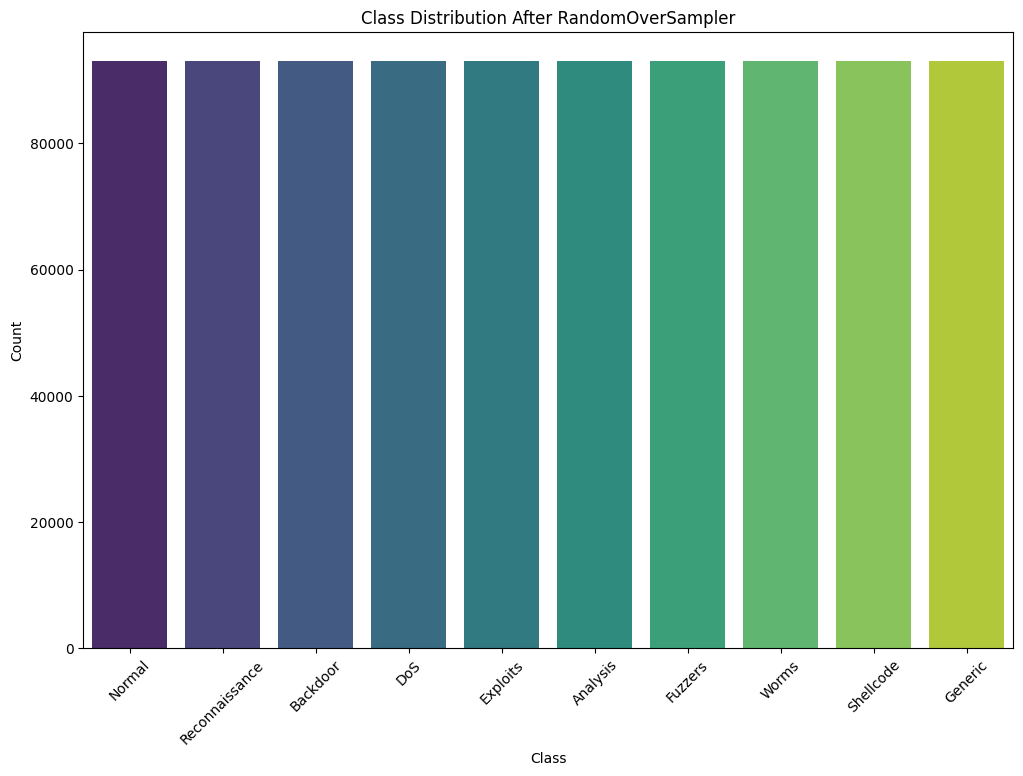

In [ ]:
# Converting resampling data to Data-Frame
resampled_df=ppd.DataFrame(X_mpled,columns=[f'Feature_{i}' for i in range(X_mpled.shape[1])])
# Plotting the class distri-bution
resampled_df['attack_cat']=y_mpled

# creating the counting graph using the particular information
classes=['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']

#Giving the size of the figures with the parameter
mpl.figure(figsize=(12, 8))
# drawing the counting plot of with specific para-meter
sns.countplot(x='attack_cat',data=resampled_df,palette='viridis')

# setting the tittles of the graph
mpl.title('Class Distribution After RandomOverSampler')
# printing the x-labls in the plot
mpl.xlabel('Class')
# adding the labls in the plot
mpl.ylabel('Count')

# Set custom x-axis labelling
mpl.xticks(ticks=range(len(classes)),labels=classes,rotation=45)

# visualizing the dataset
mpl.show()


# Splitting Training & Testing

In [ ]:
#Using the modified data, creating trained and assessment dta sets.
X_train,X_test,y_train,y_test=train_test_split(X_mpled,y_mpled,test_size=0.2,random_state=42)

# Define Function

A classification is assessed by the function evaluate_result, which accepts as inputs the true labels (y_true), forecasted labels (y_pred), as well as optionally predicted probabilities (y_pred_proba). The four primary metrics that are computed and shown are accuracy, precision (weighted), recall (weighted), as well as F1 score (weighted). It then produces a report on categorization, which it publishes. It also computes and uses a heatmap to illustrate the confusion matrix, showing the real vs predicted labels along with labeled axes along with a title. This function gives the categorization model performance insights that are both numerical and visual.

In [ ]:
def evaluate_result(y_true,y_pred,y_pred_proba=None):
    # evalute the accu from the data
    print("Accuracy: {:.8f}".format(accuracy_score(y_true,y_pred)))

    # use the testing data to compute the preci-vlaue
    print("Precision: {:.8f}".format(precision_score(y_true,y_pred,average='weighted')))

    # get the reca-value withe the data
    print("Recall: {:.8f}".format(recall_score(y_true,y_pred,average='weighted')))

    # discover the f1socre's value
    print("F1_Score: {:.8f}".format(f1_score(y_true,y_pred,average='weighted')))

    # Drawing the classied tabel with the result
    report=classification_report(y_true,y_pred)
    # showing the result table
    print("Classification Report:\n", report)

    # drawing the matrics of plot confusing
    cm=confusion_matrix(y_true,y_pred)
    # sketch the data's perplexing matrices
    mpl.figure(figsize=(10,6))
    # applying the model's xlabel printing
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
    # use the y label in the graph
    mpl.xlabel("Predicted")
    # show the header in the graph
    mpl.ylabel("True")
    # adding tittles in the graph
    mpl.title("Confusion Matrix")
    # displaying the matrix
    mpl.show()


To depict the Receiver Operating Characteristic (ROC) curves for a classification with multiple classes problem, this code defines the plot_multiclass_roc function. In order to compute the ROC curve, the area under the curve scores, and binary labels, it first imports the required libraries from sklearn. Next, the function receives as inputs the predicted probabilities (y_pred_proba) and true labels (y_true). It does this by converting the true labels into a binary format, calculating for every class, and then outputting the AUC (Area Under the Curve) for every class. Additionally, it computes the AUC for the micro-average of the ROC curve, essentially aggregates all classes.The function then creates a plot of the ROC curve for each class in various colors, adds a micro-average curve, as well as presents the plot with the relevant labels, titles, and legends.

In [ ]:
# importing the libray with the result
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_pred_proba):
    # show the chamber of the data
    n_classes = y_pred_proba.shape[1]

    # Converting the labels to binary output.
    y_true_bin=label_binarize(y_true,classes=nym.arange(n_classes))

    #Calculating each class's ROC curve as well as ROC AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    #Computing the curve by looping through
    for i in range(n_classes):
       #Determining the socre measurements as the estimator's probability
        fpr[i],tpr[i], _ = roc_curve(y_true_bin[:, i],y_pred_proba[:, i])
        # Identifying the values in the graph's categories
        roc_auc[i]=auc(fpr[i],tpr[i])
        # With eight decimal places of precision, print every ROC-AUC score associated with the i-th class.
        print(f"Class {i} ROC-AUC: {roc_auc[i]:.8f}")

    #Finding the location under the curve by flattening the real basic labels.
    fpr["micro"],tpr["micro"], _ =roc_curve(y_true_bin.ravel(),y_pred_proba.ravel())
    # Calculating the AUC for the curve.
    roc_auc["micro"]=auc(fpr["micro"], tpr["micro"])
    # Printing the ROC-verage score with eight decimal places.
    print(f"Micro-average ROC-AUC: {roc_auc['micro']:.8f}")

    # Plotting all ROC curves
    mpl.figure(figsize=(10, 8))
    # Generating a list of colors using the rainbow colormap
    colors = mpl.cm.rainbow(nym.linspace(0, 1, n_classes))
    # Iterating over every class and matching color
    for i, color in zip(range(n_classes), colors):
        #displaying the ROC shape for every class along with the matching color
        mpl.plot(fpr[i],tpr[i],color=color,lw=2,label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
    # A performance metric that is aggregated across all classes is the plotted curve.
    mpl.plot(fpr["micro"],tpr["micro"],color='navy',lw=2,linestyle=':',label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
    # To illustrate a random classifier, draw a line down the as (1, 1).
    mpl.plot([0, 1],[0, 1],color='gray',linestyle='--')
    #Adding labels to the x-lbls in the plots
    mpl.xlim([0.0, 1.0])
    # Setting the y-axis limits to range from 0.0 to 1.05 to allow for some space
    mpl.ylim([0.0, 1.05])
    # Setting the x-labls in the graph
    mpl.xlabel('False Positive Rate')
    # adding the y-axis labls as the plot
    mpl.ylabel('True Positive Rate')
    #printing the titrtles of the plot
    mpl.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
    # Adding a legending to the plot
    mpl.legend(loc="lower right")
    # visualizing the graph
    mpl.show()

# Reshaping Dataset

In [ ]:
# Reshaping the trained information to add a third dimension
x_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
# Add a third dimension and data in a similar way.
x_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

(744000, 198, 1)
(186000, 198, 1)


In [ ]:
# Importing the function from the algorithm resources.
from tensorflow.keras.utils import to_categorical
# Converted the trained labels to categorical format (one-hot encoding)
y_train_categorical=to_categorical(y_train)
# Transform the testing labels into a categorical representation using one-hot encoding.
y_test_categorical=to_categorical(y_test)

In [ ]:
! pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.9 MB/s eta 0:00:00


# CNN Model

Using TensorFlow/Keras, this code constructs and trains a 1D, which is used for classification. The first step is loading the libraries required for deep learning, which include layers such as MaxPooling1D, Dense, and Conv1D. The mathematical representation (alg) is built in a sequential fashion. A max pooling layer is added after the Conv1D with 128 filters as well as a kernel size of 5 to minimize the spatial dimensions. A second pooling layer is introduced after the addition of a second 64-filter Conv1D layer. with 10 units as well as a softmax activation is added for classification after the output has been flattened.for five epochs on reshaped data used for  categorical crossentropy loss. It is then validated using the test data.

In [ ]:
# Importing a library for hyperparameter optimization
import tensorflow as tf
#In order to develop neural networks, modeling class
from tensorflow.keras.models import Sequential
#Here, we create the deep machine learning techniques using these libraries.
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Building the algorithms
alg = Sequential()

#Tunable units with respective return sequences are added to the layer
alg.add(Conv1D(filters=128,kernel_size=5,activation='relu',input_shape=(x_train_reshaped.shape[1], 1)))
# giving the shaping of information as inputing to the estimaor
alg.add(MaxPooling1D(pool_size=2))
# Adding lyr with tunable dropout rate to prevent overfitting
alg.add(Conv1D(filters=64,kernel_size=5,activation='relu'))
# modfied-layr, also with tunable unitting but no returned sequences
alg.add(MaxPooling1D(pool_size=2))

# Flattening the output
alg.add(Flatten())

 # To lesen overfiting, add another-layer with an adjustable-rate
alg.add(Dense(10,activation='softmax'))

# Gathering the algorithms using the particular parameter
alg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#filtterd algortimsn with the specific para-meter vlaues in the mdls
history=alg.fit(x_train_reshaped,y_train_categorical,epochs=5,batch_size=32,validation_data=(x_test_reshaped,y_test_categorical))

Epoch 1/5
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.6291 - loss: 0.9451 - val_accuracy: 0.7089 - val_loss: 0.7401
Epoch 2/5
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.7147 - loss: 0.7304 - val_accuracy: 0.7249 - val_loss: 0.6969
Epoch 3/5
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.7246 - loss: 0.6936 - val_accuracy: 0.7324 - val_loss: 0.6682
Epoch 4/5
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.7317 - loss: 0.6716 - val_accuracy: 0.7309 - val_loss: 0.6650
Epoch 5/5
23250/23250 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.7362 - loss: 0.6572 - val_accuracy: 0.7321 - val_loss: 0.6561


In [ ]:
# Using the best performing model to determine labels to feed the simulated data
trn_prd_cnn=alg.predict(x_train_reshaped)
#Taking the index and converting the anticipated probability to class labels
y_tin_pred_classes=nym.argmax(trn_prd_cnn,axis=1)
#Translating the authentic labels into class labels
tin_clases=nym.argmax(y_train_categorical,axis=1)

# applying the index to translate the anticipated probability into class labels
y_test_pred=alg.predict(x_test_reshaped)
# Making the class labels from the genuine labels
tst_ped_clases=nym.argmax(y_test_pred,axis=1)
# Predicted the categories for the experimental data using the most effective alg.
y_tst_clses=nym.argmax(y_test_categorical,axis=1)

23250/23250 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step
5813/5813 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [ ]:
# getting the vlues for the the curved
y_train_roc=alg.predict(x_train_reshaped)
# obtaining the curved values for the
y_test_roc=alg.predict(x_test_reshaped)

23250/23250 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
5813/5813 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


# Testing Result

Accuracy: 0.73211290
Precision: 0.74762252
Recall: 0.73211290
F1_Score: 0.73714017
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18578
           1       0.83      0.78      0.81     18470
           2       0.45      0.38      0.41     18472
           3       0.33      0.48      0.39     18486
           4       0.65      0.52      0.58     18483
           5       0.43      0.46      0.44     18812
           6       0.91      0.82      0.86     18726
           7       0.98      0.99      0.98     18763
           8       0.89      0.92      0.90     18617
           9       1.00      0.97      0.98     18593

    accuracy                           0.73    186000
   macro avg       0.75      0.73      0.74    186000
weighted avg       0.75      0.73      0.74    186000



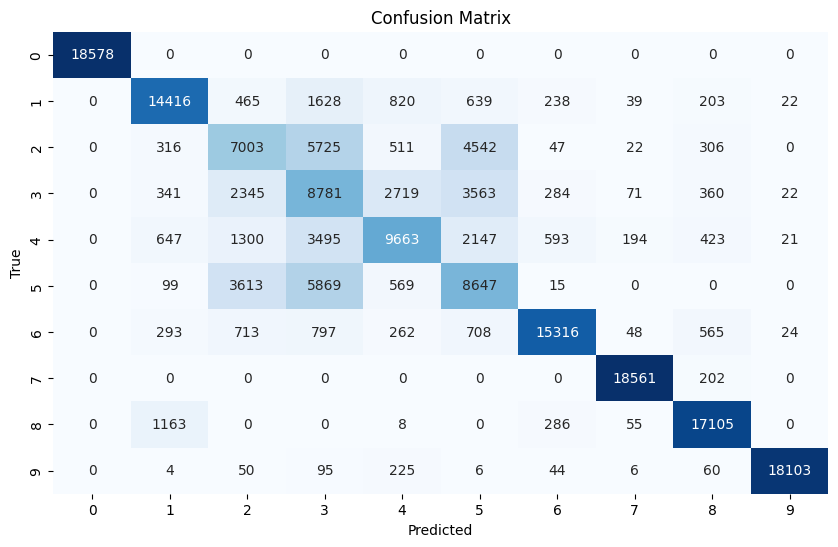

In [ ]:
evaluate_result(y_tst_clses,tst_ped_clases)

# F1-Score Graph

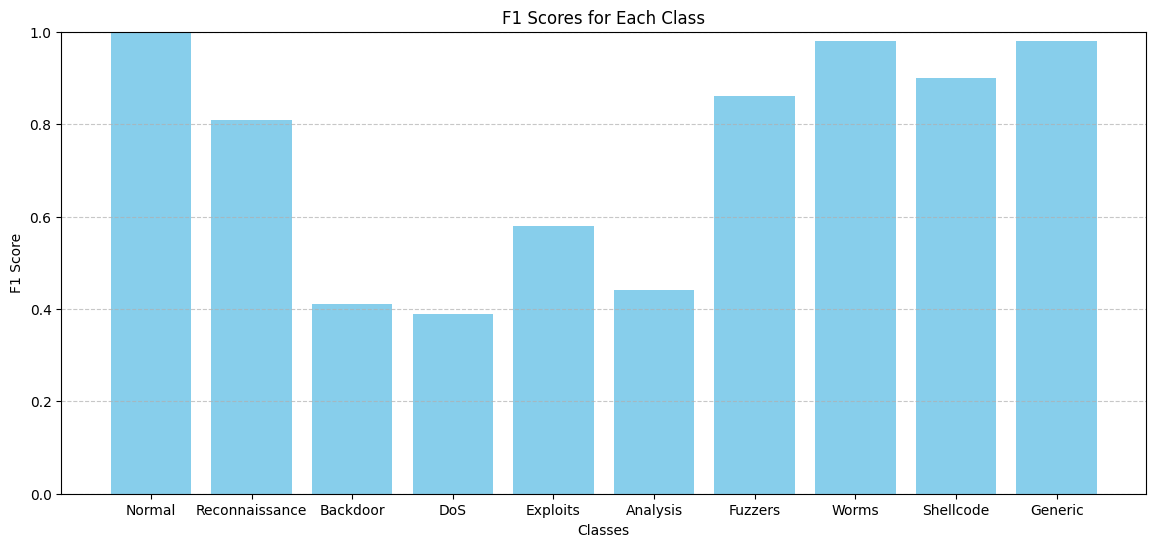

In [ ]:
classes=['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
# establishing the values of various algorithms
f1_scores = [1.00, 0.81, 0.41, 0.39, 0.58, 0.44, 0.86, 0.98, 0.90, 0.98]

# Creating the bar graph
mpl.figure(figsize=(14, 6))
# drawing the graph of the para-meter
mpl.bar(classes,f1_scores,color='skyblue')
# setting the x-axis labelling
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# Set y-axis limits from 0 to 1 for better visualization
mpl.ylim(0, 1)
# Adding a grid to the graph
mpl.grid(axis='y',linestyle='--',alpha=0.7)

# Showing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 1.00000000
Class 1 ROC-AUC: 0.96673822
Class 2 ROC-AUC: 0.91578081
Class 3 ROC-AUC: 0.88113711
Class 4 ROC-AUC: 0.91490793
Class 5 ROC-AUC: 0.92021714
Class 6 ROC-AUC: 0.97031676
Class 7 ROC-AUC: 0.99961195
Class 8 ROC-AUC: 0.99564264
Class 9 ROC-AUC: 0.99759168
Micro-average ROC-AUC: 0.97601558


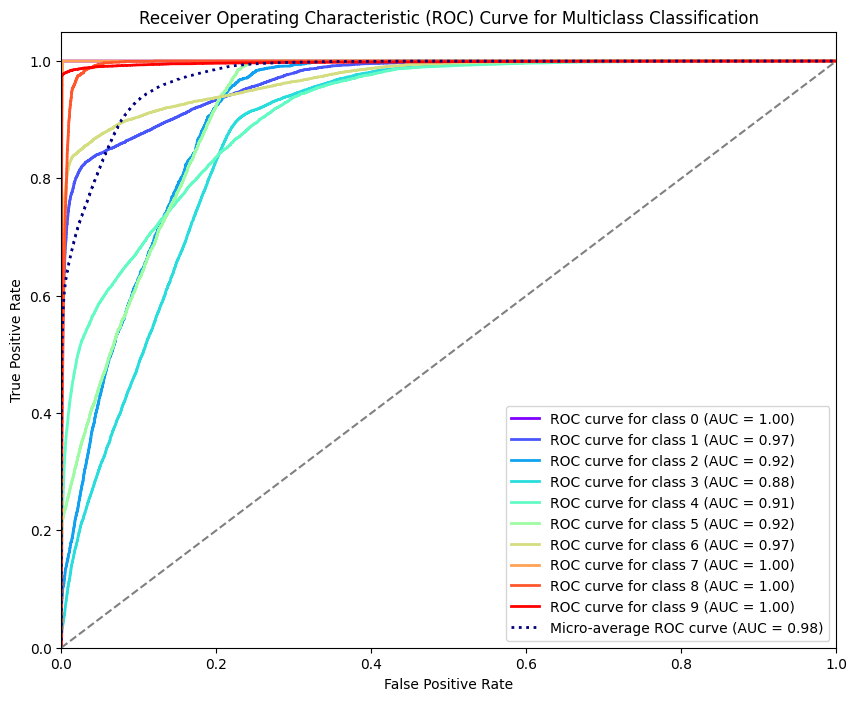

In [ ]:
plot_multiclass_roc(y_tst_clses,y_test_roc)

# Training Result

Accuracy: 0.73202285
Precision: 0.76808871
Recall: 0.73202285
F1_Score: 0.73089412
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     74422
           1       0.87      0.77      0.82     74530
           2       0.51      0.28      0.37     74528
           3       0.45      0.24      0.31     74514
           4       0.70      0.51      0.59     74517
           5       0.34      0.84      0.49     74188
           6       0.94      0.80      0.86     74274
           7       0.97      1.00      0.98     74237
           8       0.90      0.91      0.91     74383
           9       1.00      0.98      0.99     74407

    accuracy                           0.73    744000
   macro avg       0.77      0.73      0.73    744000
weighted avg       0.77      0.73      0.73    744000



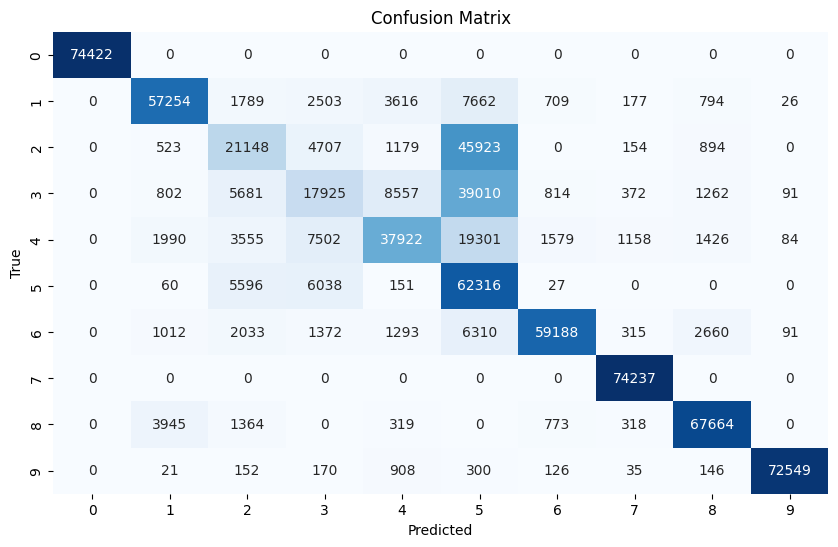

In [ ]:
evaluate_result(tin_clases,y_tin_pred_classes)

# F1-Score Graph

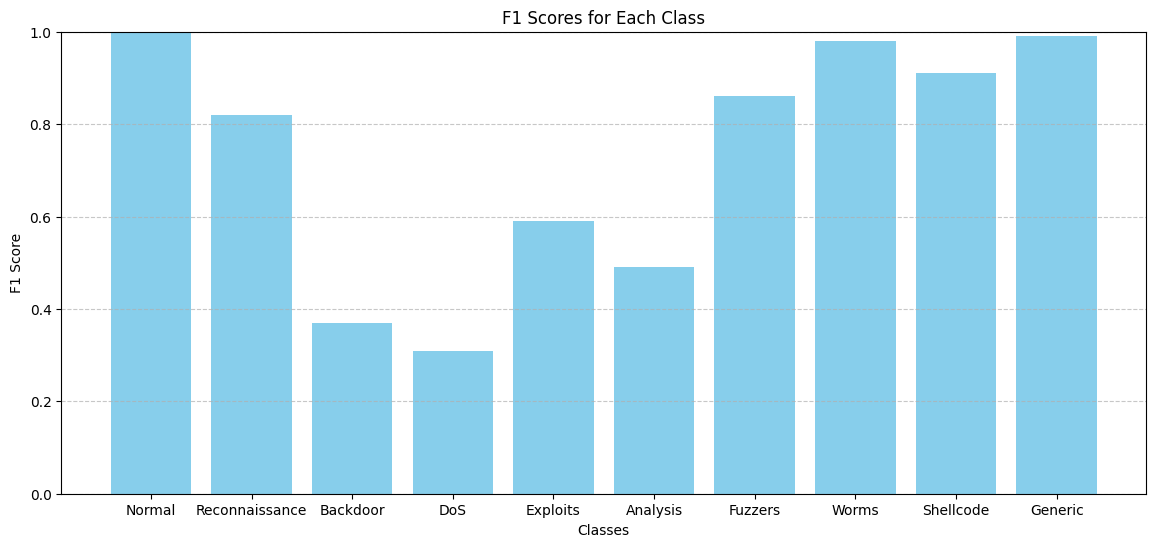

In [ ]:
# Specify the class names on the list for each categorization category.
classes=['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
# Identify the set of F1 scores for every class.
f1_scores=[1.00, 0.82, 0.37, 0.31, 0.59, 0.49, 0.86, 0.98, 0.91, 0.99]

#providing the shape of figure
mpl.figure(figsize=(14, 6))
# drawing the graph of the para-meter
mpl.bar(classes, f1_scores, color='skyblue')
# setting the x-axis labelling
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# For improved visibility, set the axis's y limits from 0 to 1.
mpl.ylim(0, 1)
# Including a grid in the diagram
mpl.grid(axis='y',linestyle='--',alpha=0.7)
# visualizing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 1.00000000
Class 1 ROC-AUC: 0.96731770
Class 2 ROC-AUC: 0.91689403
Class 3 ROC-AUC: 0.88499219
Class 4 ROC-AUC: 0.91577325
Class 5 ROC-AUC: 0.92085936
Class 6 ROC-AUC: 0.97062348
Class 7 ROC-AUC: 0.99963920
Class 8 ROC-AUC: 0.99578452
Class 9 ROC-AUC: 0.99788514
Micro-average ROC-AUC: 0.97622583


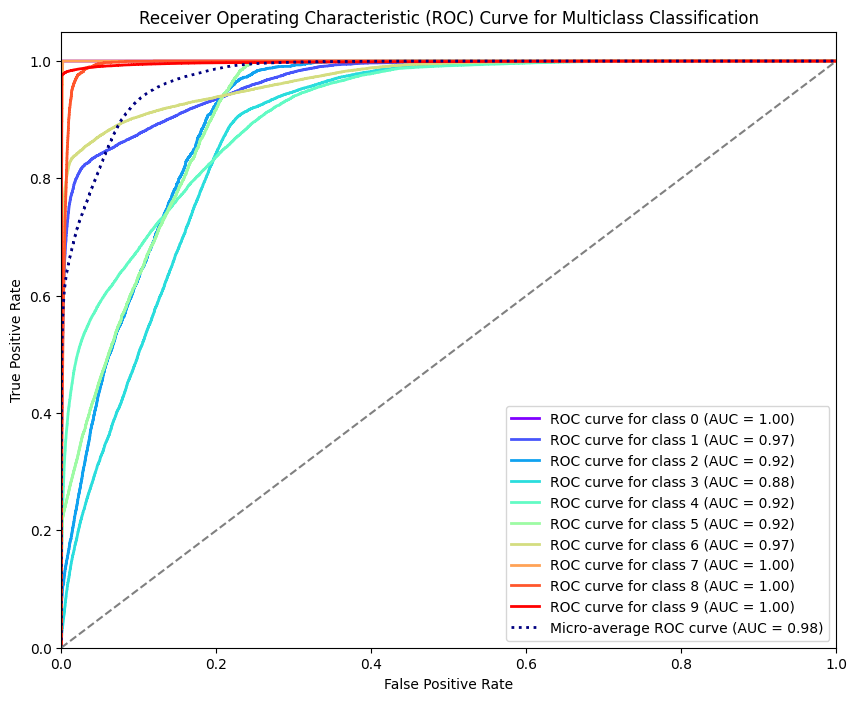

In [ ]:
plot_multiclass_roc(tin_clases,y_train_roc)

# **Before** **Balancing**

In [ ]:
#Using the modified data, creating training and assessment data sets.
X_train_un,X_test_un,y_train_un,y_test_un=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Reshaping Data

In [ ]:
# Reshaping the trained information to add a third dimension
x_train_reshaped_un=X_train_un.reshape(X_train_un.shape[0], X_train_un.shape[1], 1)
# Add a third dimension and data in a similar way.
x_test_reshaped_un=X_test_un.reshape(X_test_un.shape[0], X_test_un.shape[1], 1)

(206138, 198, 1)
(51535, 198, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
# Converted the trained labels to categorical format (one-hot encoding)
y_train_categorical_un=to_categorical(y_train_un)
# Transform the testing labels into a categorical representation using one-hot encoding.
y_test_categorical_un=to_categorical(y_test_un)

In [ ]:
y_test_categorical_un.shape

(51535, 10)

# CNN Model

This code uses the Keras Sequential API to construct and train a model using a CNN for a classification that includes multiple classes job. The input is downsampled using a MaxPooling1D layer after the Conv1D layer, which has 128 filters and a kernel size of 5 at the beginning of the model. In order to extract features, a second MaxPooling1D layer and a second Conv1D layer with 64 filters are added. After flattening the output, as well as a softmax activation function is introduced for classification into multiple classes (10 classes). the model is assembled using the Adam optimizer.At last, the model is trained using the fit technique across two epochs with a batch size of 32, assessing performance throughout training using a validation set.

In [ ]:
# Explain how lstm The model works
est = Sequential()

#Tunable units with respective return sequences are added to the layer
est.add(Conv1D(filters=128,kernel_size=5,activation='relu',input_shape=(x_train_reshaped_un.shape[1], 1)))
# Include a layer depending on the given settings
est.add(MaxPooling1D(pool_size=2))

# Adding lyr with tunable dropout rate to prevent overfitting
est.add(Conv1D(filters=64,kernel_size=5,activation='relu'))
# Adding a layer with a rate selected from a range
est.add(MaxPooling1D(pool_size=2))

# Flattening the output
est.add(Flatten())

# Densinge output layer with 10 outputs for 10 classesd
est.add(Dense(10,activation='softmax'))

# Defined a customing the rating of vlues
learning_rate = 0.099

#Building the est with a particular learning rate.
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
# To add legality, an option to select from layer may be introduced.
est.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Trained the top mannequin
history=est.fit(x_train_reshaped_un,y_train_categorical_un,epochs=2,batch_size=32,validation_data=(x_test_reshaped_un,y_test_categorical_un))

Epoch 1/2
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8044 - loss: 0.6360 - val_accuracy: 0.8322 - val_loss: 0.5567
Epoch 2/2
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7998 - loss: 0.5825 - val_accuracy: 0.7932 - val_loss: 0.5494


In [ ]:
# Using the best performing model to determine categories for the data being simulated
tan_ped_cn = est.predict(x_train_reshaped_un)
# Translating the anticipated probability into class labels
tran_prd_clases = nym.argmax(tan_ped_cn, axis=1)
#Translating the authentic labels into class labels
cnn_tin_clases = nym.argmax(y_train_categorical_un, axis=1)

# Predicted the categories for the experimental data using the most effective model
y_tst_ped_lst = est.predict(x_test_reshaped_un)
#Taking the index and converting the anticipated probability to class labels
cn_tst_prd_clsses = nym.argmax(y_tst_ped_lst, axis=1)
# Making the class labels from the genuine labels
x_tst_clases = nym.argmax(y_test_categorical_un, axis=1)

6442/6442 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
y_train_prob=est.predict(x_train_reshaped_un)
y_test_prob=est.predict(x_test_reshaped_un)

6442/6442 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


# Testing Result

Accuracy: 0.79320850
Precision: 0.78298261
Recall: 0.79320850
F1_Score: 0.78323531
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     18675
           1       0.35      0.42      0.38      2770
           2       0.00      0.00      0.00       471
           3       0.30      0.18      0.22      3293
           4       0.67      0.61      0.64      8853
           5       0.00      0.00      0.00       538
           6       0.45      0.75      0.56      4742
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00       318
           9       1.00      0.97      0.98     11849

    accuracy                           0.79     51535
   macro avg       0.38      0.39      0.38     51535
weighted avg       0.78      0.79      0.78     51535



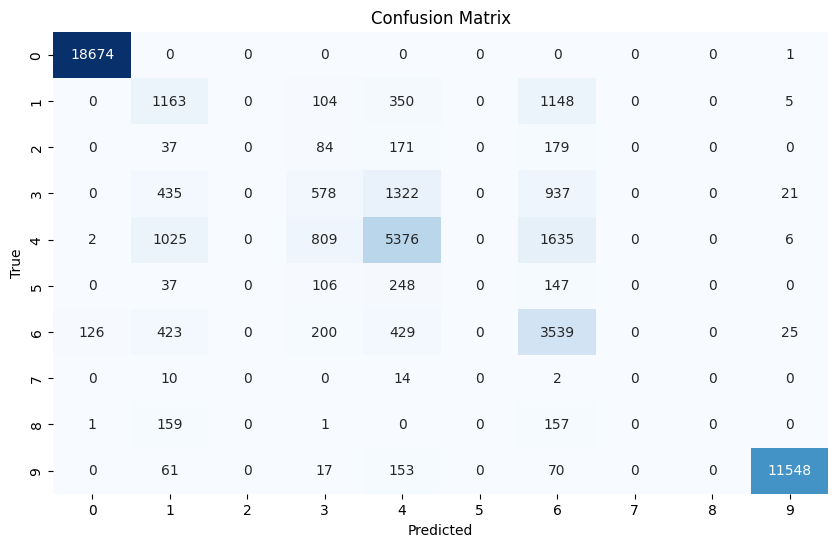

In [ ]:
evaluate_result(x_tst_clases,cn_tst_prd_clsses)

# F1-Score Graph

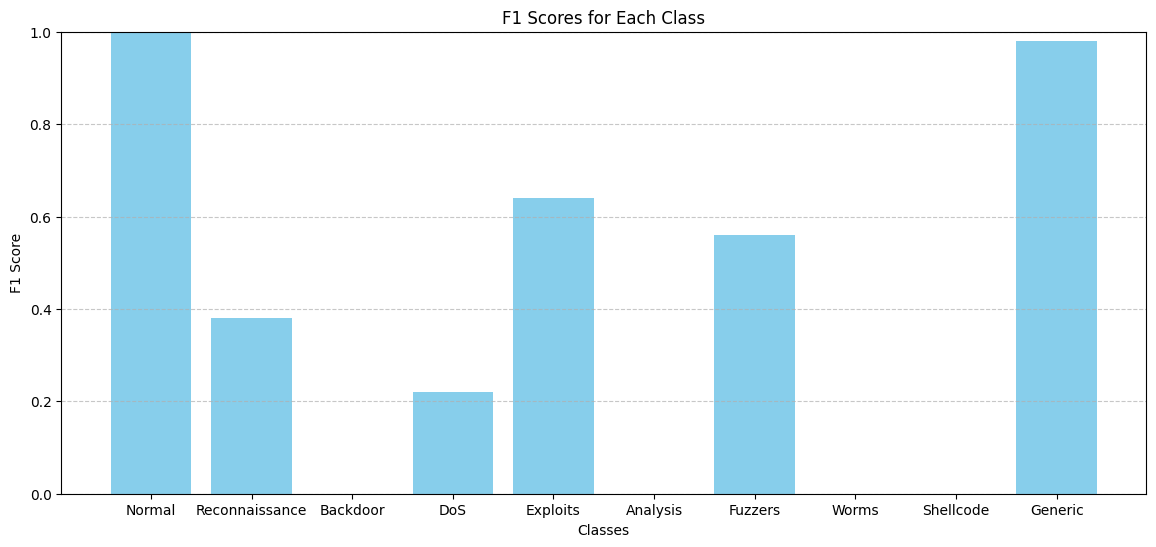

In [ ]:
# Defining the list of class names for classification categories
classes = ['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
# Define the list of F1 scores corresponding to each class
f1_scores = [1.00, 0.38, 0.00, 0.22, 0.64, 0.00, 0.56, 0.00, 0.00, 0.98]
#Make a new plotting figure that is 14 by 6 inches in dimension.
mpl.figure(figsize=(14, 6))
#Plot-ting the class desinations on the x-axis of a bar chart
mpl.bar(classes, f1_scores, color='skyblue')
# getting the x-label in the plot
mpl.xlabel('Classes')
# obtaining the plot's y-axis label
mpl.ylabel('F1 Score')
# print the header text in the plot
mpl.title('F1 Scores for Each Class')
# setting the limit as the model
mpl.ylim(0, 1)
# adding the gridding the values
mpl.grid(axis='y',linestyle='--',alpha=0.7)
# showing the graph
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99975429
Class 1 ROC-AUC: 0.92425785
Class 2 ROC-AUC: 0.89095741
Class 3 ROC-AUC: 0.89368474
Class 4 ROC-AUC: 0.93508778
Class 5 ROC-AUC: 0.90872269
Class 6 ROC-AUC: 0.94435565
Class 7 ROC-AUC: 0.97648619
Class 8 ROC-AUC: 0.95206206
Class 9 ROC-AUC: 0.99156823
Micro-average ROC-AUC: 0.98307575


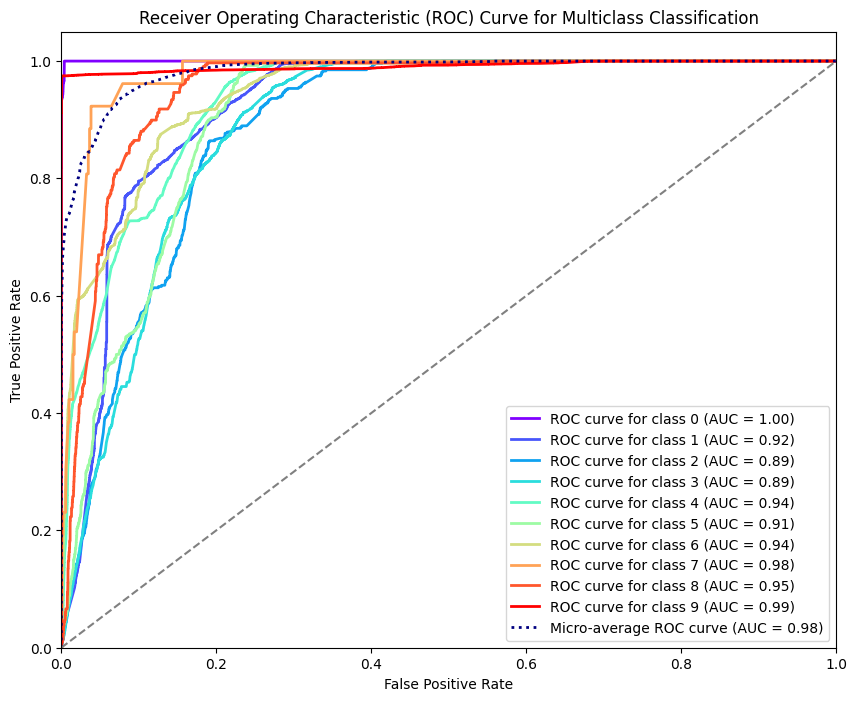

In [ ]:
plot_multiclass_roc(x_tst_clases,y_test_prob)

# Training Result

Accuracy: 0.79370616
Precision: 0.78356729
Recall: 0.79370616
F1_Score: 0.78380667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     74325
           1       0.36      0.43      0.39     11217
           2       0.00      0.00      0.00      1858
           3       0.32      0.18      0.23     13060
           4       0.67      0.61      0.64     35672
           5       0.00      0.00      0.00      2139
           6       0.46      0.75      0.57     19504
           7       0.00      0.00      0.00       148
           8       0.00      0.00      0.00      1193
           9       0.99      0.97      0.98     47022

    accuracy                           0.79    206138
   macro avg       0.38      0.39      0.38    206138
weighted avg       0.78      0.79      0.78    206138



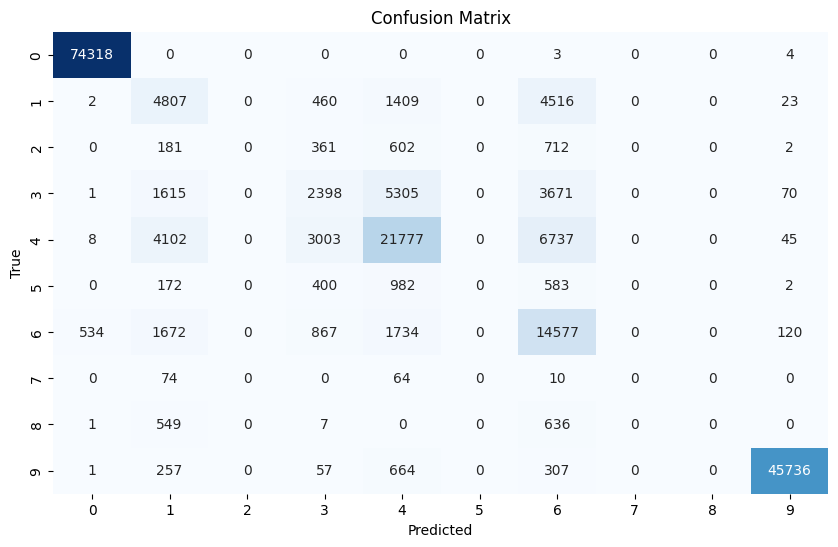

In [ ]:
evaluate_result(cnn_tin_clases,tran_prd_clases)

# F1-score Graph

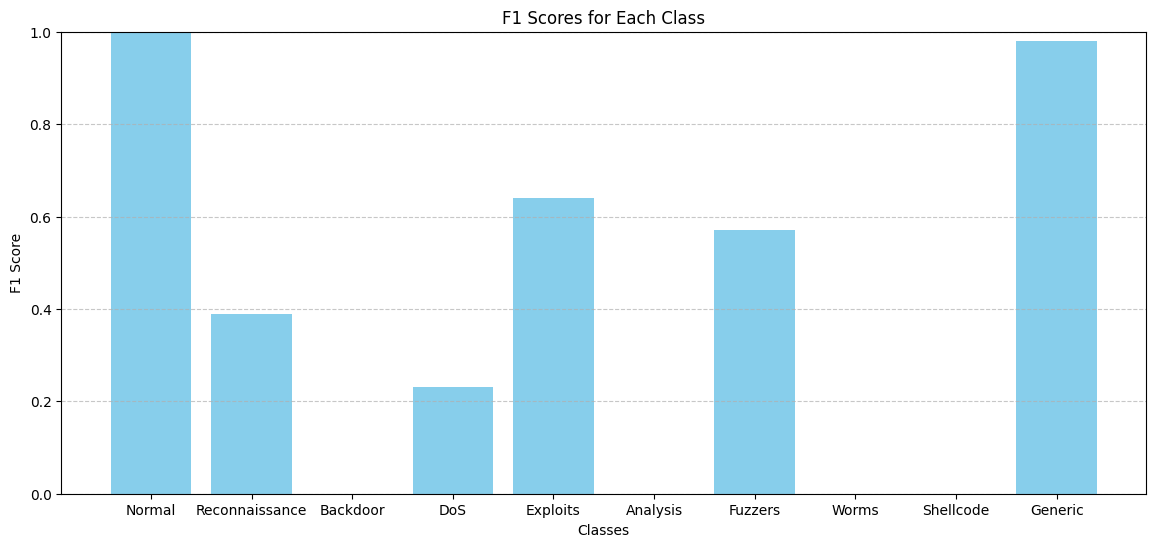

In [ ]:
classes=['Normal','Reconnaissance','Backdoor','DoS','Exploits','Analysis','Fuzzers','Worms','Shellcode','Generic']
f1_scores=[1.00, 0.39, 0.00, 0.23, 0.64, 0.00, 0.57, 0.00, 0.00, 0.98]

# giving the size of the plot with vlues
mpl.figure(figsize=(14,6))
# getting the plot of the specific para-meter
mpl.bar(classes,f1_scores,color='skyblue')
mpl.xlabel('Classes')
# getting the y-labeling the plot
mpl.ylabel('F1 Score')
# setting the tittles of the graph
mpl.title('F1 Scores for Each Class')
# Improve the visualization by setting the y-axis limits from 0 to 1.
mpl.ylim(0, 1)
# Including a grid in the diagram
mpl.grid(axis='y',linestyle='--',alpha=0.7)
# Display the storyline'k'
mpl.show()

# Roc Curve

Class 0 ROC-AUC: 0.99972519
Class 1 ROC-AUC: 0.92664933
Class 2 ROC-AUC: 0.89165059
Class 3 ROC-AUC: 0.89365053
Class 4 ROC-AUC: 0.93402116
Class 5 ROC-AUC: 0.90835067
Class 6 ROC-AUC: 0.94388214
Class 7 ROC-AUC: 0.95353363
Class 8 ROC-AUC: 0.95252327
Class 9 ROC-AUC: 0.99174490
Micro-average ROC-AUC: 0.98294290


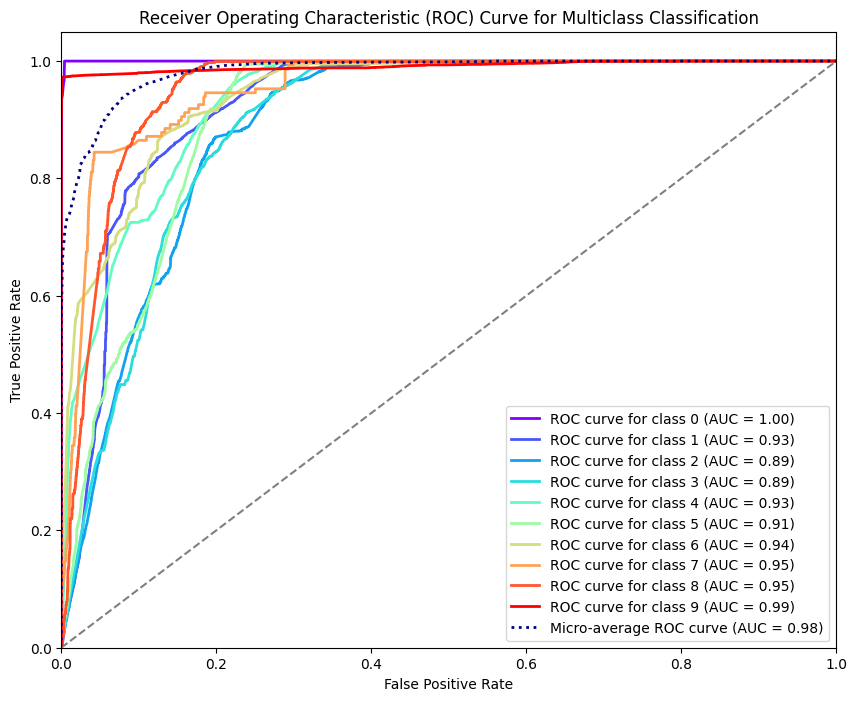

In [ ]:
plot_multiclass_roc(cnn_tin_clases,y_train_prob)